# Atividade 01 - Parte 01 - Inventário de emissões usando Python

Desenvolvedores: Douglas Silveira e Ezequiel de Conti

## Abrir planilha de fatores de emissões compilada.
Foi utilizado para a contrução deste trabalho, o capítulo 11.6 da AP42, pois o empreendimento analisado trata-se de uma empresa de cimento.

In [5]:

import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
fe_folder = 'tabelas/FE'  # Usando '/' como separador de caminho (portabilidade)
path = os.path.join(cwd, fe_folder)
print(path)

# Indicando nome do arquivo
chapterNumer = 11
subChapter = 6
file = f'chpt_{chapterNumer}_{subChapter}.csv'  # Usando f-string para formatação mais concisa
print(file)

# Abrindo arquivo utilizando o Pandas, especificando o encoding
fe = pd.read_csv(os.path.join(path, file), encoding='latin-1')  # Tente 'latin-1' como encoding alternativo
print(fe)




C:\Users\admin\Documents\ENS5174_202401\tabelas/FE
chpt_11_6.csv
                                               Source          PM   PM-10  \
0                                    Wet process kiln   65.000000  16.000   
1                           Wet process kiln with ESP    0.380000   0.330   
2                 Wet process kiln with fabric filter    0.230000     NaN   
3   Wet process kiln with cooling tower, multiclon...    0.100000     NaN   
4                           Dry process kiln with ESP    0.500000     NaN   
5                 Dry process kiln with fabric filter    0.100000   0.084   
6                                      Preheater kiln  130.000000     NaN   
7                             Preheater kiln with ESP    0.130000     NaN   
8                   Preheater kiln with fabric filter    0.130000     NaN   
9                 Preheater/precalciner kiln with ESP    0.024000     NaN   
10  Preheater/precalciner process kiln with fabric...    0.100000     NaN   
11  Preheat

C:\Users\admin\AppData\Local\Temp\ipykernel_8312\1378874236.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(first_seventh_process['Source'], rotation=90, fontsize=8)
C:\Users\admin\AppData\Local\Temp\ipykernel_8312\1378874236.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(other_processes['Source'], rotation=90, fontsize=8)


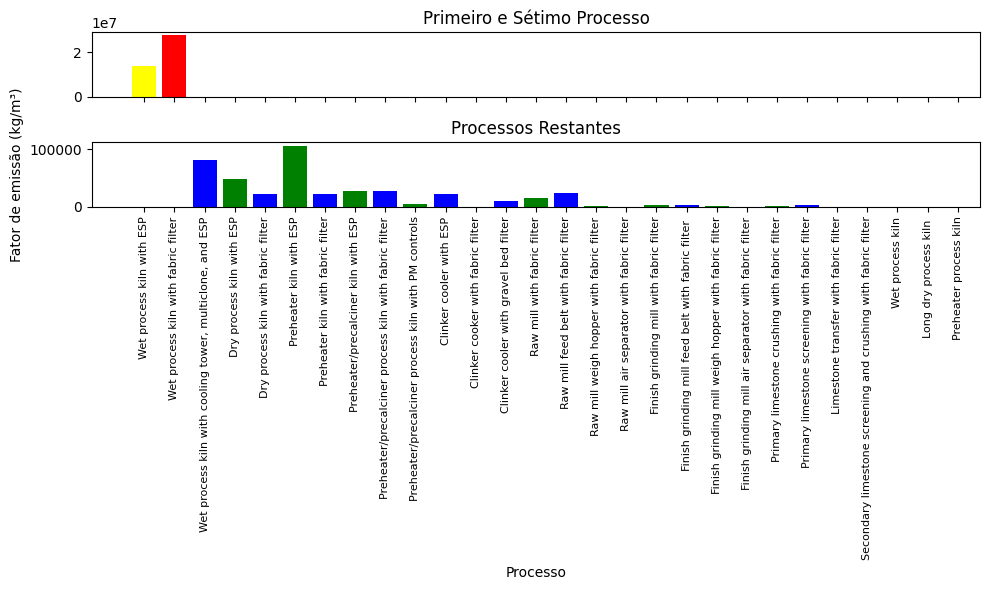

In [35]:
import matplotlib.pyplot as plt

atv = 213000 #tava de atividade da empresa


# Multiplicando os valores da tabela por 213000
fe_multiplied = fe.copy()  # Criando uma cópia dos dados originais
fe_multiplied['PM'] = fe_multiplied['PM'] * atv  # Multiplicando os valores da coluna 'PM'

# Dividindo os dados em dois grupos: primeiro e sétimo processo e o restante
first_seventh_process = fe_multiplied.loc[[0, 6]]  # Primeiro e sétimo processo
other_processes = fe_multiplied.drop([0, 6])  # Restante dos processos

# Criando o primeiro gráfico com o primeiro e sétimo processo
fig, axs = plt.subplots(2, figsize=(10, 6), sharex=True)

# Plotando o primeiro gráfico
bars = axs[0].bar(first_seventh_process['Source'], first_seventh_process['PM'], color=['yellow', 'red'])
axs[0].set_xticklabels(first_seventh_process['Source'], rotation=90, fontsize=8)
axs[0].set_ylabel('')  # Removendo a legenda de y do primeiro gráfico
axs[0].set_title('Primeiro e Sétimo Processo')

# Criando o segundo gráfico com os processos restantes
bars = axs[1].bar(other_processes['Source'], other_processes['PM'], color=['blue', 'green'])
axs[1].set_xticklabels(other_processes['Source'], rotation=90, fontsize=8)
axs[1].set_ylabel('Fator de emissão (kg/m³)')  # Adicionando a legenda de y apenas para o segundo gráfico
axs[1].set_xlabel('Processo')
axs[1].set_title('Processos Restantes')

# Exibindo os gráficos
plt.tight_layout()
plt.show()




196978.685


TypeError: 'value' must be an instance of str or bytes, not a float

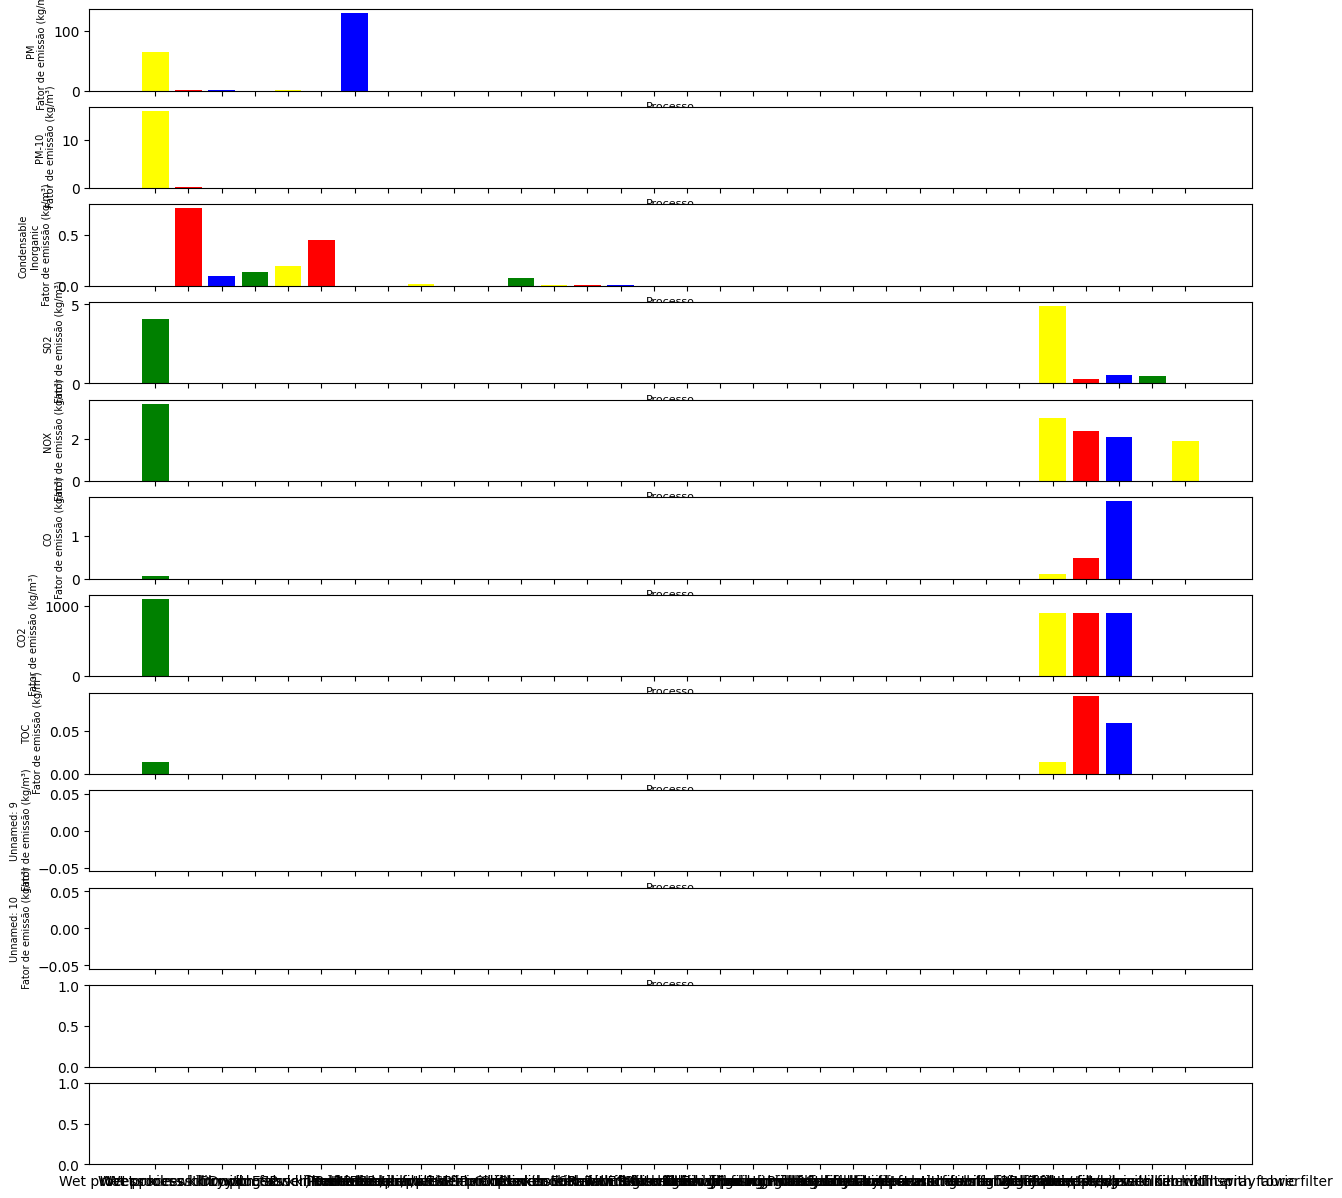

In [7]:
#Plotando os fatores de emissão

import matplotlib.pyplot as plt

atv = 1000 #Considerando uma taxa de atividade
emis = fe['PM']*atv

#Somando dataframe
print(emis.sum())

fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(15,15)) #loop para preencher o subplot com os graficos de barra

#Criando a figura com Marplotlib
for ii in range(1, len(fe.columns)): #a primeira coluna é a identificação da fonte
    ax[ii-1].bar(fe['Source'], fe.iloc[:,ii], color = ['yellow','red','blue','green']) #colocar nessa figura nova
    ax[ii-1].set_xlabel('Processo', fontsize=8) #coloca o eixo x
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n Fator de emissão (kg/m³)', fontsize=7) #ajeitar unidade g/kg

fig.savefig(cwd+'\\figuras\\barplot(fatorEmiss.png')

## Criando taxa de atividade aleatoria com sazonalidade
Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabelidade também deve conter uma componete aleatória.

[472.79050159 233.82356714 271.17213512 963.02513545 507.8609752
 640.04594571  88.86272348 946.82708363 672.06034042 343.44299786
 329.67326784 197.67238385 869.93282963  53.23836512 502.17012214
 828.69653579 804.59291607 325.95892854 280.6429131  790.509072
 141.16973008 559.65550341 536.71491805  18.53804135 850.87597733
 314.10632868 380.14512989 453.8831973  285.54636437  64.26808355
 441.97691693 882.19850463 345.29513075  70.18571163 629.57061874
 868.23729031  60.29548949  25.70796233 444.48545514 184.04526498
 393.38572472 974.46652193 817.60268855 957.36534409 437.37560764
 408.06273904 161.93704219 411.29553985 565.00758305  35.07406285
 814.94038902 237.03394165 898.44884961 611.56847812 850.79122242
 924.06554223 842.77571262 213.31527806 196.93626419 158.97277661
 957.95078735 302.28235157 592.66896551 983.79637677  95.67944659
 941.46049329 262.37021461 507.90308138 968.97875534 315.41445329
 178.72288653 575.70982524 212.61477259 711.77839014 991.61284447
 493.26876658

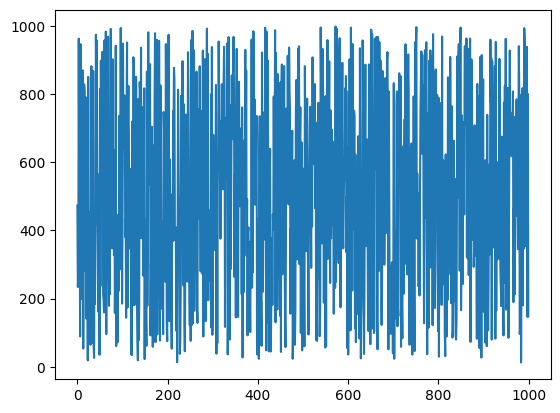

In [8]:
#criando vetor com valores aleatórios
import numpy as np
atvMax = 1000
atvMin = 12
n = 1000
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
print(atv)

#Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(atv)


In [9]:
#criar um vetor com as datas
import datetime as timedelta
data_inicial = datetime(2024,1,1)
data_final = datetime(2024,31,12)


NameError: name 'datetime' is not defined

In [54]:
#ajustar meus numeros aleatorios com base no comprimento do vetor de datas
#extraindo numero de linhas/de datas
n = data.shape[0]
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
#print(atv)

#Criando uma figura com os valores aleatórios
import pandas as pd
df



NameError: name 'data' is not defined